In [17]:
import statsapi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Test pulling info for Ohtani
player_info = statsapi.get('person', {'personId': 660271})
print(player_info)

{'copyright': 'Copyright 2025 MLB Advanced Media, L.P.  Use of any content on this page acknowledges agreement to the terms posted here http://gdx.mlb.com/components/copyright.txt', 'people': [{'id': 660271, 'fullName': 'Shohei Ohtani', 'link': '/api/v1/people/660271', 'firstName': 'Shohei', 'lastName': 'Ohtani', 'primaryNumber': '17', 'birthDate': '1994-07-05', 'currentAge': 30, 'birthCity': 'Oshu', 'birthCountry': 'Japan', 'height': '6\' 3"', 'weight': 210, 'active': True, 'primaryPosition': {'code': 'Y', 'name': 'Two-Way Player', 'type': 'Two-Way Player', 'abbreviation': 'TWP'}, 'useName': 'Shohei', 'useLastName': 'Ohtani', 'boxscoreName': 'Ohtani', 'nickName': 'Showtime', 'gender': 'M', 'isPlayer': True, 'isVerified': False, 'pronunciation': 'show-HEY oh-TAWN-ee', 'mlbDebutDate': '2018-03-29', 'batSide': {'code': 'L', 'description': 'Left'}, 'pitchHand': {'code': 'R', 'description': 'Right'}, 'nameFirstLast': 'Shohei Ohtani', 'nameSlug': 'shohei-ohtani-660271', 'firstLastName': 'Sh

In [3]:
#def get_team_ids():
#     teams = statsapi.get('teams', {'sportId': 1})['teams']
#     return [team['id'] for team in teams]

#def get_players_from_team(team_id, season='2021'):
#     roster = statsapi.get('team_roster', {'teamId': team_id, 'season': season})
#     return roster['roster']

#def get_player_info_flat(player_id):
#     person = statsapi.get('person', {'personId': player_id})
#     info = person['people'][0]

#     return {
#         'id': info.get('id'),
#         'fullName': info.get('fullName'),
#         'birthDate': info.get('birthDate'),
#         'birthCountry': info.get('birthCountry'),
#         'height': info.get('height'),
#         'weight': info.get('weight'),
#         'primaryPosition': info.get('primaryPosition', {}).get('abbreviation'),
#         'batSide': info.get('batSide', {}).get('code'),
#         'pitchHand': info.get('pitchHand', {}).get('code'),
#         'debutDate': info.get('mlbDebutDate'),
#         'active': info.get('active'),
#     }

#def get_all_players_df(season='2021'):
#     team_ids = get_team_ids()
#     player_data = []

#     for team_id in team_ids:
#         players = get_players_from_team(team_id, season)
#         for player in players:
#             player_id = player['person']['id']
#             info = get_player_info_flat(player_id)
#             player_data.append(info)

#     df = pd.DataFrame(player_data)
#     return df

#df_players = get_all_players_df()
#print(df_players.head())

In [4]:
# df_players.head()

In [5]:
# df_players.to_csv('mlb_players_2021.csv', index=False)

### **Only run the code below here because everyone should have the two dfs on their computer !**

In [6]:
players = pd.read_csv("mlb_players_2021.csv")
pitches = pd.read_csv("regseason.csv")

In [7]:
players.rename(columns={"id" : "batter","fullName" : "batter_fullName" , "birthCountry" : "batter_birthCountry"}, inplace=True)
players.head()

,batter,batter_fullName,birthDate,batter_birthCountry,height,weight,primaryPosition,batSide,pitchHand,debutDate,active
0,642758,Domingo Acevedo,1994-03-06,Dominican Republic,"6' 7""",240,P,R,R,2021-06-21,True
1,664119,Austin Allen,1994-01-16,USA,"6' 1""",219,C,L,R,2019-05-11,False
2,462101,Elvis Andrus,1988-08-26,Venezuela,"6' 0""",210,SS,R,R,2009-04-06,False
3,642456,Luis Barrera,1995-11-15,Dominican Republic,"6' 0""",195,OF,L,L,2021-05-19,True
4,605135,Chris Bassitt,1989-02-22,USA,"6' 5""",217,P,R,R,2014-08-30,True


In [8]:
pitches.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,count,PBhand,pitch_cat
0,1,SL,2021-10-03,85.1,2.39,6.05,"Detmers, Reid",641487,672282,single,...,2,4,Standard,Standard,293.0,0.079,0.780,0_1,bLpL,breaking
1,2,FF,2021-10-03,93.8,2.31,6.03,"Detmers, Reid",641487,672282,NaN,...,1,4,Standard,Standard,150.0,0.000,-0.045,0_0,bLpL,fastball
2,3,CU,2021-10-03,73.9,2.12,6.25,"Detmers, Reid",664238,672282,strikeout,...,1,4,Standard,Standard,329.0,-0.032,-0.315,2_2,bRpL,breaking
3,4,FF,2021-10-03,94.6,2.43,5.96,"Detmers, Reid",664238,672282,NaN,...,1,4,Standard,Standard,146.0,0.000,0.047,1_2,bRpL,fastball
4,5,FF,2021-10-03,94.3,2.08,6.15,"Detmers, Reid",664238,672282,NaN,...,1,4,Standard,Standard,151.0,0.000,0.000,1_2,bRpL,fastball


In [9]:
# Merge pitches df with info about the batter
full_df = pd.merge(pitches, players[["batter","batter_fullName","batSide", "batter_birthCountry"]], on="batter")
full_df.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,count,PBhand,pitch_cat,batter_fullName,batSide,batter_birthCountry
0,1,SL,2021-10-03,85.1,2.39,6.05,"Detmers, Reid",641487,672282,single,...,Standard,293.0,0.079,0.780,0_1,bLpL,breaking,J.P. Crawford,L,USA
1,2,FF,2021-10-03,93.8,2.31,6.03,"Detmers, Reid",641487,672282,NaN,...,Standard,150.0,0.000,-0.045,0_0,bLpL,fastball,J.P. Crawford,L,USA
2,3,CU,2021-10-03,73.9,2.12,6.25,"Detmers, Reid",664238,672282,strikeout,...,Standard,329.0,-0.032,-0.315,2_2,bRpL,breaking,Dylan Moore,R,USA
3,4,FF,2021-10-03,94.6,2.43,5.96,"Detmers, Reid",664238,672282,NaN,...,Standard,146.0,0.000,0.047,1_2,bRpL,fastball,Dylan Moore,R,USA
4,5,FF,2021-10-03,94.3,2.08,6.15,"Detmers, Reid",664238,672282,NaN,...,Standard,151.0,0.000,0.000,1_2,bRpL,fastball,Dylan Moore,R,USA


In [10]:
# Remove the pitches that were fouled, in play, or swung at
not_hit = ["called_strike", "ball"]
pitches_not_hit = full_df[full_df['description'].isin(not_hit)].copy()
len(pitches_not_hit)

390288

So we have 390,000 pitches to work with that were thrown but not swung at or hit

In [11]:
# Check that we only have balls and called strikes
pitches_not_hit['description'].unique()

array(['called_strike', 'ball'], dtype=object)

In [12]:
pitches_not_hit["strike_zone"] = pitches_not_hit["zone"] <= 9 # Determine if the pitch was actually in the zone

pitches_not_hit["called_correctly"] = (
    ((pitches_not_hit["zone"] <= 9) & (pitches_not_hit["type"] == "S")) | # Pitch is in the zone and is called a strike  
    ((pitches_not_hit["zone"] > 9) & (pitches_not_hit["type"] == "B"))    # Pitch is not in the zone and is called a ball
) 
pitches_not_hit["called_correctly"] = pitches_not_hit["called_correctly"].astype(int) # This will be are target variable -- whether the pitch was called "correctly"

In [13]:
# Check how many pitches we have that were "called correctly"
len(pitches_not_hit[pitches_not_hit["called_correctly"] == 1])

357779

In [14]:
# Check how many pitches we have that were not "called correctly"
len(pitches_not_hit[pitches_not_hit["called_correctly"] == 0])

32509

So there are aound 360,000 correctly called pitches at 32,000 which are not called correctly -- we might want to consider removing some of the correctly called pitches so that we have the same amount for each. But 64,000 data points should be enough for training our model. 

# Feature Visualization

Before training a model, lets visualize some features of the dataset with relation to our target variable "called correctly" to help identify features which may be prevalent to the outcomes of our model. Lets start with release speed, with the idea that faster pitches are harder to call as the umpire will have less to to analyze the pitch and make the call. 

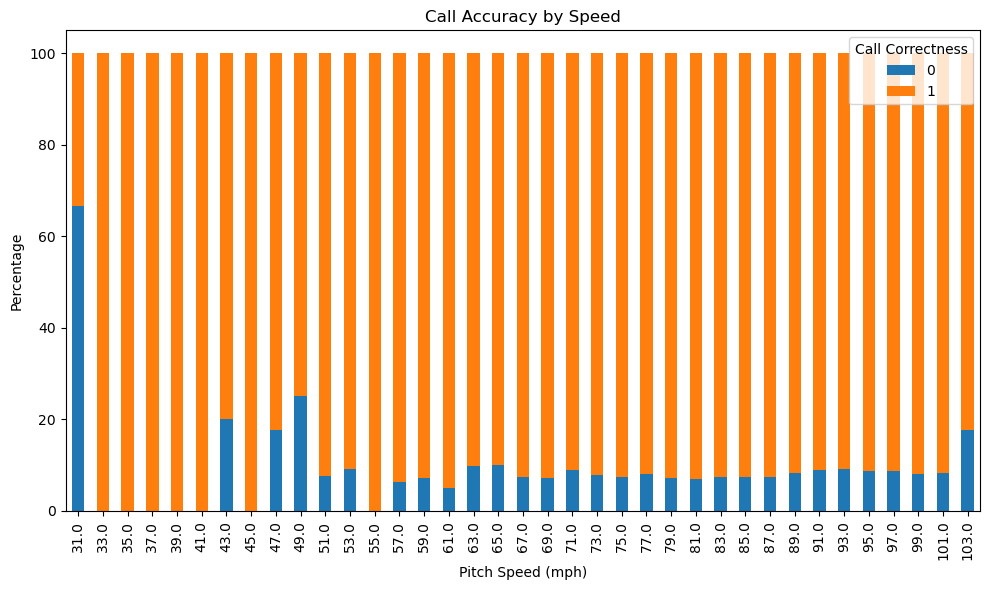

In [15]:
# create 2 mph speed groups
pitches_not_hit["speed_group"] = pitches_not_hit["release_speed"] // 2 

# Count pitches per speed_group and call correctness
grouped = pitches_not_hit.groupby(['speed_group', 'called_correctly']).size().unstack()

# Convert to percentage (so each bar sums to 100)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Recalculate midpoint speeds
grouped_percent.index = grouped_percent.index * 2 + 1  # 2 * group + 1 = midpoint

# Plot
grouped_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.ylabel("Percentage")
plt.xlabel("Pitch Speed (mph)")
plt.title("Call Accuracy by Speed")
plt.legend(title = "Call Correctness", loc = "upper right")
plt.tight_layout()
plt.show()


Interestingly, it seems like pitch speed has little relationship to call accuracy. Lets now look at how release position affects call accuracy.

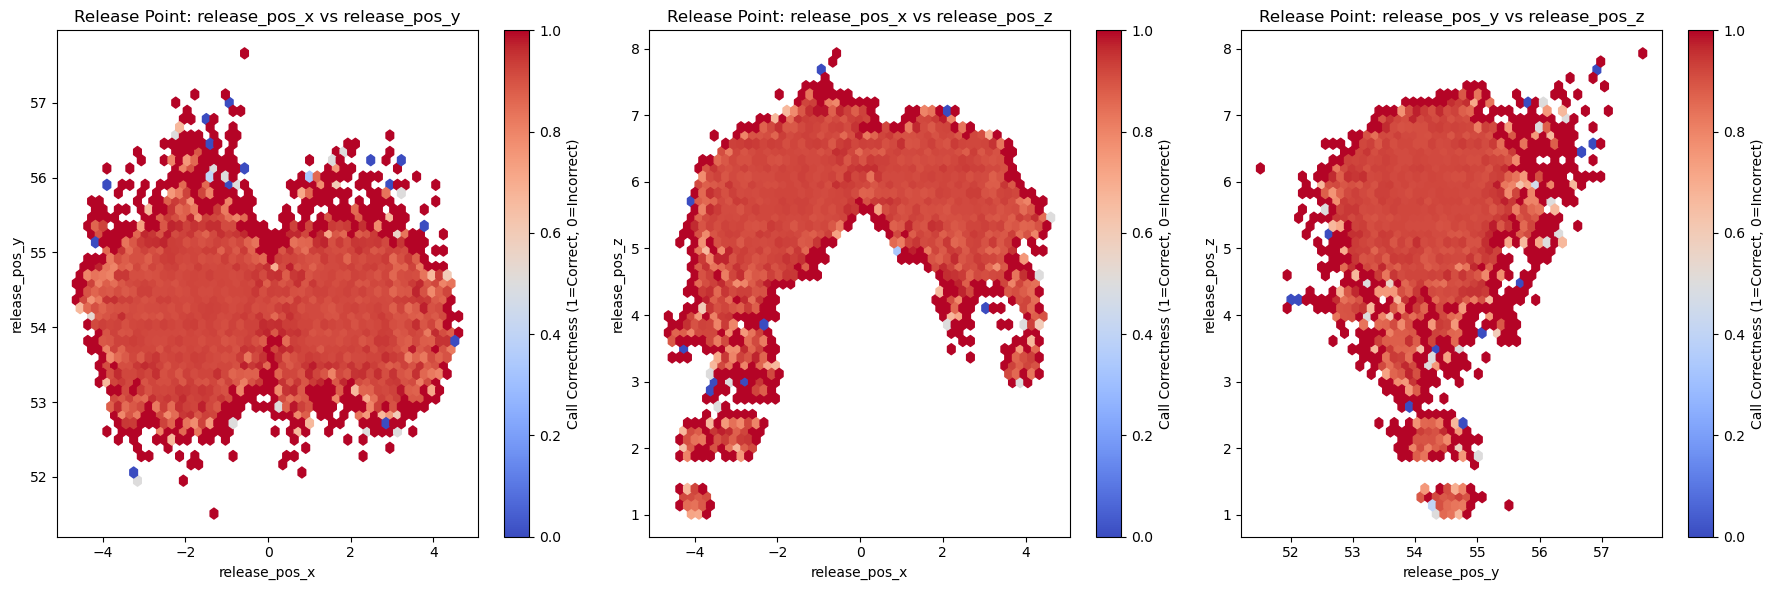

In [22]:
# create a density plot of release position in the x and y axis
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

# List of combinations for x, y, and z axes
combinations = [
    ('release_pos_x', 'release_pos_y'),
    ('release_pos_x', 'release_pos_z'),
    ('release_pos_y', 'release_pos_z')
]

# Loop over the combinations and plot hexbin on each subplot
for ax, (x_var, y_var) in zip(axes, combinations):
    hb = ax.hexbin(
        pitches_not_hit[x_var], 
        pitches_not_hit[y_var], 
        C = pitches_not_hit['called_correctly'],  # Color by correctness
        gridsize = 50, 
        cmap='coolwarm'
    )
    cb = fig.colorbar(hb, ax = ax, label = 'Call Correctness (1=Correct, 0=Incorrect)')
    ax.set_title(f"Release Point: {x_var} vs {y_var}")
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)

# Adjust layout
plt.tight_layout()
plt.show()

Generally, MLB umpires seem to be very good at calling pitches correctly. It doesn't seem like release position has a large impact on call correctness, althogh there may be marginally lower accuracy along the edges of the distribution. 